# Temperature Profiles Tutorial
This tutorial shows how to create and use temperature-pressure profiles. Currently, there are three temperature models: ``isothermal``, ``guillot``, and ``madhu``.

Lets start by importing some necessary modules:

In [1]:
import pyratbay.constants as pc
import pyratbay.atmosphere as pa

import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4)

In [2]:
# Define a pressure profile where to evaluate the temperature models:
nlayers = 101
ptop = '1e-7 bar'
pbottom = '100 bar'
pressure_cgs = pa.pressure(ptop, pbottom, nlayers)
# See help(pa.pressure) for alternative ways to set the boundaries/units

# Same pressure array but in bar units:
pressure = pressure_cgs / pc.bar

## Isothermal Profile

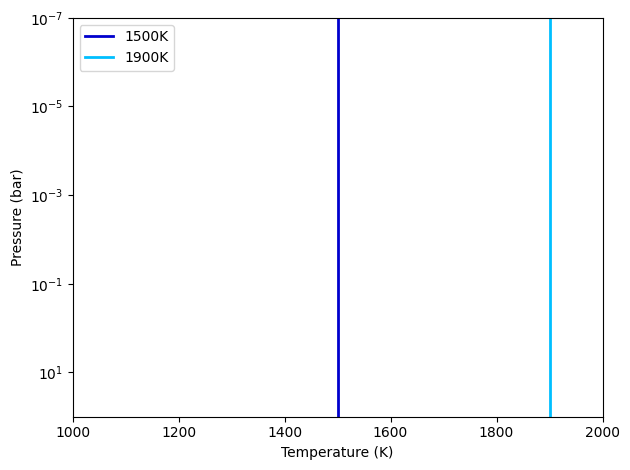

In [3]:
# To initialize an isothermal TP model, provide the number of layers:
tp_iso = pa.tmodels.Isothermal(pressure)


# Evaluate a TP profile at a given tempperature:
temp_iso_1500K = tp_iso(1500.0)
# to get another profile, evaluate at a different value:
temp_iso_1900K = tp_iso([1900.0])

# Plot the results:
plt.figure(10)
plt.clf()
ax = plt.subplot(111)
ax.plot(temp_iso_1500K, pressure, color='mediumblue', lw=2.0, label='1500K')
ax.plot(temp_iso_1900K, pressure, color='deepskyblue', lw=2.0, label='1900K')
ax.set_yscale('log')
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.set_xlim(1000, 2000)
ax.legend()
plt.tight_layout()

In [4]:
# This is some useful data contained in the object:
print(tp_iso)

Model name: isothermal
Number of parameters (npars): 1
Parameter names (pnames): ['T_iso']
Parameter Latex names (texnames): ['$T\\ ({\\rm K})$']
Pressure array (pressure, barye):
 [1.000e-07 1.230e-07 1.514e-07 1.862e-07 2.291e-07 2.818e-07 3.467e-07
 4.266e-07 5.248e-07 6.457e-07 7.943e-07 9.772e-07 1.202e-06 1.479e-06
 1.820e-06 2.239e-06 2.754e-06 3.388e-06 4.169e-06 5.129e-06 6.310e-06
 7.762e-06 9.550e-06 1.175e-05 1.445e-05 1.778e-05 2.188e-05 2.692e-05
 3.311e-05 4.074e-05 5.012e-05 6.166e-05 7.586e-05 9.333e-05 1.148e-04
 1.413e-04 1.738e-04 2.138e-04 2.630e-04 3.236e-04 3.981e-04 4.898e-04
 6.026e-04 7.413e-04 9.120e-04 1.122e-03 1.380e-03 1.698e-03 2.089e-03
 2.570e-03 3.162e-03 3.890e-03 4.786e-03 5.888e-03 7.244e-03 8.913e-03
 1.096e-02 1.349e-02 1.660e-02 2.042e-02 2.512e-02 3.090e-02 3.802e-02
 4.677e-02 5.754e-02 7.079e-02 8.710e-02 1.072e-01 1.318e-01 1.622e-01
 1.995e-01 2.455e-01 3.020e-01 3.715e-01 4.571e-01 5.623e-01 6.918e-01
 8.511e-01 1.047e+00 1.288e+00 1.585e+

## Guillot TP Profiles

The ``guillot`` model has six parameters as defined in Line et al. (2013): $\log\kappa'$,
$\log\gamma_1$, $\log\gamma_2$, $\alpha$, $T_{\rm irr}$, and $T_{\rm int}$.  The temperature profile is given as:

$$ T^4(p) = \frac{3 T_{\rm int}^{4}}{4} \left(\frac{2}{3} + \tau\right)
    + (1-\alpha) \frac{3 T_{\rm irr}^{4}}{4} \xi_1(\tau)
    +    \alpha  \frac{3 T_{\rm irr}^{4}}{4} \xi_2(\tau), $$
with
$$    \xi_i(\tau) = \frac{2}{3}
        + \frac{2}{3\gamma_i} \left[1 + \left(\frac{\gamma_i\tau}{2}-1\right)e^{-\gamma_i\tau}\right]
        + \frac{2\gamma_i}{3} \left(1-\frac{\tau^{2}}{2}\right)E_{2}(\gamma_i\tau), $$

where $E_{2}(\gamma_{i}\tau)$ is the second-order exponential
integral; $T_{\rm int}$ is the internal heat temperature; and $\tau(p)
= \kappa' p$ (note that this parameterization differs from that of
Line et al. (2013), which are related as $\kappa' \equiv \kappa/g$).  $T_{\rm irr}$ parametrizes the stellar irradiation absorbed by the planet as:

$$  T_{\rm irr} = \left(\frac{1-A}{f}\right)^{1/4}
                \left( \frac{R_{\rm s}}{2a}\right)^{1/2} T_{\rm s}, $$


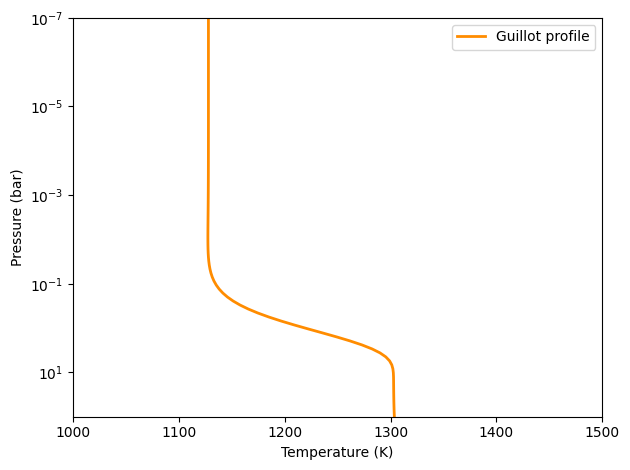

In [5]:
# To initialize a Guillot TP model, provide the pressure array (in CGS units):
tp_guillot = pa.tmodels.Guillot(pressure_cgs)


# Evaluate a Guillot TP profile for a given set of parameters:
log_kappa, log_gamma1, log_gamma2, alpha = -6.0, -0.25, 0.0, 0.0
t_irr = 1200.0
t_int = 100.0

params = log_kappa, log_gamma1, log_gamma2, alpha, t_irr, t_int
temp_guillot = tp_guillot(params)


# Plot the profile:
plt.figure(20)
plt.clf()
ax = plt.subplot(111)
ax.plot(temp_guillot, pressure, color='darkorange', lw=2.0, label='Guillot profile')
ax.set_yscale('log')
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.set_xlim(1000, 1500)
ax.legend()
plt.tight_layout()

In [6]:
# This is some useful data contained in the object:
print(tp_guillot)

Model name: guillot
Number of parameters (npars): 6
Parameter names (pnames): ["log_kappa'", 'log_gamma1', 'log_gamma2', 'alpha', 'T_irr', 'T_int']
Parameter Latex names (texnames): ["$\\log\\ \\kappa'$", '$\\log\\ \\gamma_1$', '$\\log\\ \\gamma_2$', '$\\alpha$', '$T_{\\rm irr} (K)$', '$T_{\\rm int} (K)$']
Pressure array (pressure, barye):
 [1.000e-01 1.230e-01 1.514e-01 1.862e-01 2.291e-01 2.818e-01 3.467e-01
 4.266e-01 5.248e-01 6.457e-01 7.943e-01 9.772e-01 1.202e+00 1.479e+00
 1.820e+00 2.239e+00 2.754e+00 3.388e+00 4.169e+00 5.129e+00 6.310e+00
 7.762e+00 9.550e+00 1.175e+01 1.445e+01 1.778e+01 2.188e+01 2.692e+01
 3.311e+01 4.074e+01 5.012e+01 6.166e+01 7.586e+01 9.333e+01 1.148e+02
 1.413e+02 1.738e+02 2.138e+02 2.630e+02 3.236e+02 3.981e+02 4.898e+02
 6.026e+02 7.413e+02 9.120e+02 1.122e+03 1.380e+03 1.698e+03 2.089e+03
 2.570e+03 3.162e+03 3.890e+03 4.786e+03 5.888e+03 7.244e+03 8.913e+03
 1.096e+04 1.349e+04 1.660e+04 2.042e+04 2.512e+04 3.090e+04 3.802e+04
 4.677e+04 5.754e+

## Madhu TP Profile


The madhu model has six parameters: $\log p_1$, $\log p_2$, $\log p_3$, $a_1$,
$a_2$, and $T_0$, as described in Madhusudhan & Seager (2009), where the pressure
values must be given in bars.  The temperature profile is given as:

$$ T(p) = \left\{
  \begin{array}{lll}
  T_0 + \left[\frac{1}{a_1}\ln(p/p_0)\right]^2 & \text{for } p < p_1
     & (\rm layer\ 1) \\
  T_2 + \left[\frac{1}{a_2}\ln(p/p_2)\right]^2 & \text{for } p_1 \le p < p_3
     & (\rm layer\ 2) \\
  T_3   & \text{for } p \ge p_3 & (\rm layer\ 3)
  \end{array} \right.
$$

A thermally inverted profile will result when $p_1 < p_2$;
a non-inverted profile will result when $p_2 < p_1$.

The pressure parameters must also satisfy: $p_1 < p_3$ (otherwise the model will return zeros).


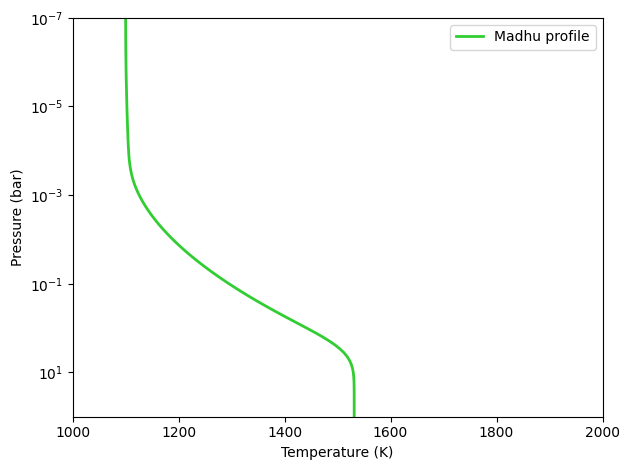

In [7]:
# To initialize a Madhu TP model, provide the pressure array (in CGS units):
tp_madhu = pa.tmodels.Madhu(pressure_cgs)


# A non thermally-inverted profile (p1 > p2):
log_p1 = -3.5
log_p2 = -4.0
log_p3 = 0.5
a1 = 3.0
a2 = 0.5
T0 = 1100.0
temp_madhu = tp_madhu([log_p1, log_p2, log_p3, a1, a2, T0])


# Plot the profile:
plt.figure(30)
plt.clf()
ax = plt.subplot(111)
ax.plot(temp_madhu, pressure, color='limegreen', lw=2.0, label='Madhu profile')
ax.set_yscale('log')
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.set_xlim(1000, 2000)
ax.legend()
plt.tight_layout()

In [8]:
# This is some useful data contained in the object:
print(tp_madhu)

Model name: madhu
Number of parameters (npars): 6
Parameter names (pnames): ['log_p1', 'log_p2', 'log_p3', 'a1', 'a2', 'T0']
Parameter Latex names (texnames): ['$\\log\\ p_1$', '$\\log\\ p_2$', '$\\log\\ p_3$', '$a_1$', '$a_2$', '$T_0$']
Pressure array (pressure, barye):
 [1.000e-01 1.230e-01 1.514e-01 1.862e-01 2.291e-01 2.818e-01 3.467e-01
 4.266e-01 5.248e-01 6.457e-01 7.943e-01 9.772e-01 1.202e+00 1.479e+00
 1.820e+00 2.239e+00 2.754e+00 3.388e+00 4.169e+00 5.129e+00 6.310e+00
 7.762e+00 9.550e+00 1.175e+01 1.445e+01 1.778e+01 2.188e+01 2.692e+01
 3.311e+01 4.074e+01 5.012e+01 6.166e+01 7.586e+01 9.333e+01 1.148e+02
 1.413e+02 1.738e+02 2.138e+02 2.630e+02 3.236e+02 3.981e+02 4.898e+02
 6.026e+02 7.413e+02 9.120e+02 1.122e+03 1.380e+03 1.698e+03 2.089e+03
 2.570e+03 3.162e+03 3.890e+03 4.786e+03 5.888e+03 7.244e+03 8.913e+03
 1.096e+04 1.349e+04 1.660e+04 2.042e+04 2.512e+04 3.090e+04 3.802e+04
 4.677e+04 5.754e+04 7.079e+04 8.710e+04 1.072e+05 1.318e+05 1.622e+05
 1.995e+05 2.455e

## Understanding Guillot parameters

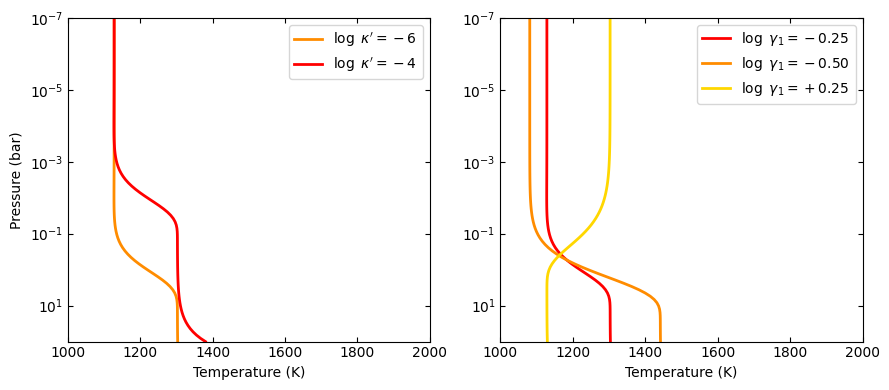

In [9]:
tp_guillot = pa.tmodels.Guillot(pressure_cgs)

# log_kappa sets the pressure where the profile changes:
# Think it as: log_P0_bars approx 6 + log_kappa
params01 = -6.0, log_gamma1, log_gamma2, alpha, t_irr, t_int
params02 = -4.0, log_gamma1, log_gamma2, alpha, t_irr, t_int
temp_guillot01 = tp_guillot(params01)
temp_guillot02 = tp_guillot(params02)


# log_gamma sets the pressure where the profile changes:
# Think it as: log_gamma > 0 temperature inversion, log_gamma < 0: non-inversion
params11 = log_kappa, -0.25, log_gamma2, alpha, t_irr, t_int
params12 = log_kappa, -0.50, log_gamma2, alpha, t_irr, t_int
params13 = log_kappa, +0.25, log_gamma2, alpha, t_irr, t_int
temp_guillot11 = tp_guillot(params11)
temp_guillot12 = tp_guillot(params12)
temp_guillot13 = tp_guillot(params13)


# Plot the results:
plt.figure(21, (9.0,4.0))
plt.clf()
ax = plt.subplot(121)
pname = tp_guillot.texnames[0]
ax.plot(temp_guillot01, pressure, color='darkorange', lw=2.0, label=f'{pname}$=-6$')
ax.plot(temp_guillot02, pressure, color='red', lw=2.0, label=f'{pname}$=-4$')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.legend()

ax = plt.subplot(122)
pname = tp_guillot.texnames[1]
ax.plot(temp_guillot11, pressure, color='red', lw=2.0, label=f'{pname}$=-0.25$')
ax.plot(temp_guillot12, pressure, color='darkorange', lw=2.0, label=f'{pname}$=-0.50$')
ax.plot(temp_guillot13, pressure, color='gold', lw=2.0, label=f'{pname}$=+0.25$')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.legend()
plt.tight_layout()

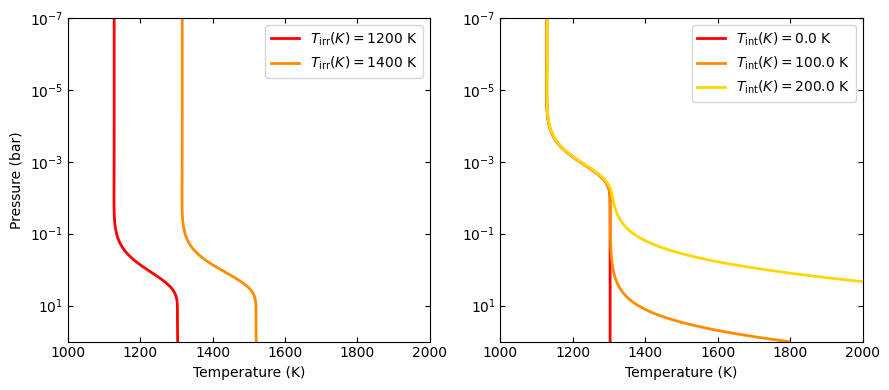

In [10]:
# T_irr sets how much incident flux the atmosphere receives:
# Think it as: higher T_irr, higher overall temperature
params21 = log_kappa, log_gamma1, log_gamma2, alpha, 1200.0, t_int
params22 = log_kappa, log_gamma1, log_gamma2, alpha, 1400.0, t_int
temp_guillot21 = tp_guillot(params21)
temp_guillot22 = tp_guillot(params22)

# T_int sets the planet internal heat from the bottom of the model:
# Think it as: higher T_int, stronger higher overall temperature
params31 = -3.0, log_gamma1, log_gamma2, alpha, t_irr, 0.0
params32 = -3.0, log_gamma1, log_gamma2, alpha, t_irr, 100.0
params33 = -3.0, log_gamma1, log_gamma2, alpha, t_irr, 300.0
temp_guillot31 = tp_guillot(params31)
temp_guillot32 = tp_guillot(params32)
temp_guillot33 = tp_guillot(params33)

plt.figure(22, (9.0,4.0))
plt.clf()
ax = plt.subplot(121)
pname = tp_guillot.texnames[4]
ax.plot(temp_guillot21, pressure, color='red', lw=2.0, label=f'{pname}$=1200$ K')
ax.plot(temp_guillot22, pressure, color='darkorange', lw=2.0, label=f'{pname}$=1400$ K')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Pressure (bar)')
ax.legend()

ax = plt.subplot(122)
pname = tp_guillot.texnames[5]
ax.plot(temp_guillot31, pressure, color='red', lw=2.0, label=f'{pname}$=0.0$ K')
ax.plot(temp_guillot32, pressure, color='darkorange', lw=2.0, label=f'{pname}$=100.0$ K')
ax.plot(temp_guillot33, pressure, color='gold', lw=2.0, label=f'{pname}$=200.0$ K')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_xlabel('Temperature (K)')
ax.legend()
plt.tight_layout()

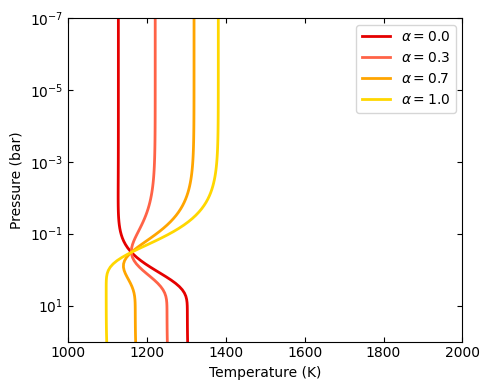

In [11]:
# A non-zero alpha (in combination with gamma2) enables a linear combination
# of two profiles with different gamma values:
temp_guillot41 = tp_guillot([log_kappa, -0.25, 0.4, 0.0, t_irr, t_int])
temp_guillot42 = tp_guillot([log_kappa, -0.25, 0.4, 0.3, t_irr, t_int])
temp_guillot43 = tp_guillot([log_kappa, -0.25, 0.4, 0.7, t_irr, t_int])
temp_guillot44 = tp_guillot([log_kappa, -0.25, 0.4, 1.0, t_irr, t_int])


plt.figure(23, (5.0,4.0))
plt.clf()
ax = plt.subplot(111)
pname = tp_guillot.texnames[3]
ax.plot(temp_guillot41, pressure, color='xkcd:red', lw=2.0, label=f'{pname}$=0.0$')
ax.plot(temp_guillot42, pressure, color='tomato', lw=2.0, label=f'{pname}$=0.3$')
ax.plot(temp_guillot43, pressure, color='orange', lw=2.0, label=f'{pname}$=0.7$')
ax.plot(temp_guillot44, pressure, color='gold', lw=2.0, label=f'{pname}$=1.0$')
ax.set_yscale('log')
ax.tick_params(which='both', right=True, top=True, direction='in')
ax.set_xlim(1000, 2000)
ax.set_ylim(np.amax(pressure), np.amin(pressure))
ax.set_ylabel('Pressure (bar)')
ax.set_xlabel('Temperature (K)')
ax.legend()
plt.tight_layout()

## Understanding Madhu parameters

In [12]:
# Preamble:
tp_madhu = pa.tmodels.Madhu(pressure_cgs)

log_p2_ninv = -4.0
log_p2_inv = 0.0
T0_ninv = 1100.0
T0_inv = 1500.0

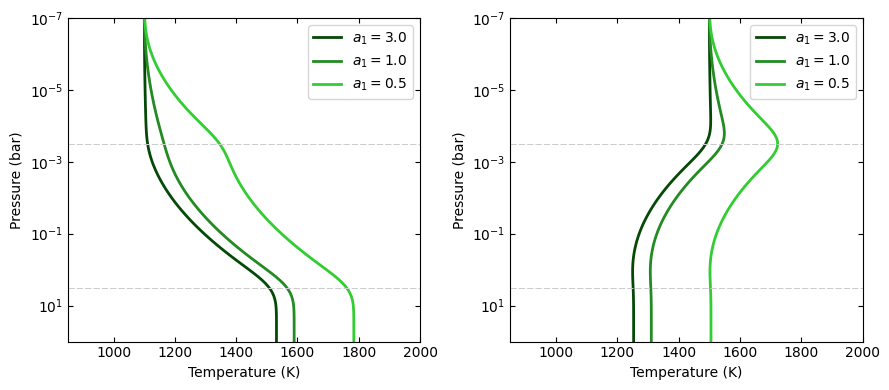

In [13]:
# a1 sets the gradient above the p1 pressure level:
# a1 >> 0.0: isothermal layer, a1>0: T increases away from P0

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, log_p2_ninv, log_p3, 3.0, a2, T0_ninv])
temp_madhu02 = tp_madhu([log_p1, log_p2_ninv, log_p3, 1.0, a2, T0_ninv])
temp_madhu03 = tp_madhu([log_p1, log_p2_ninv, log_p3, 0.5, a2, T0_ninv])

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, log_p2_inv, log_p3, 3.0, a2, T0_inv])
temp_madhu12 = tp_madhu([log_p1, log_p2_inv, log_p3, 1.0, a2, T0_inv])
temp_madhu13 = tp_madhu([log_p1, log_p2_inv, log_p3, 0.5, a2, T0_inv])

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[3]
labels = [f'{pname}$={val}$' for val in (3.0, 1.0, 0.5)]

plt.figure(31, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(850, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()
plt.tight_layout()

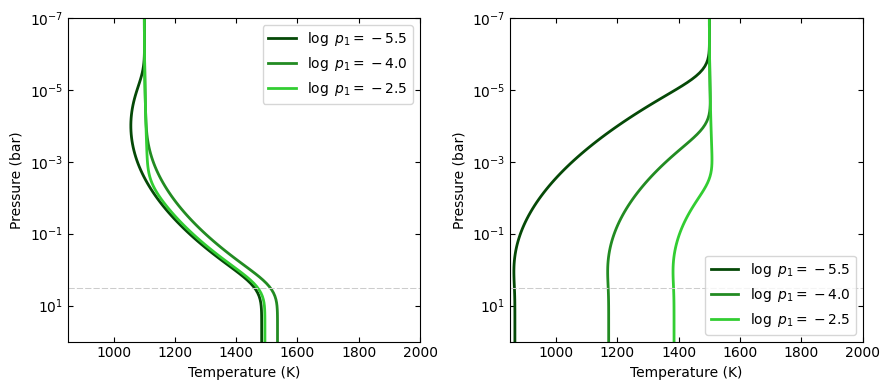

In [14]:
# log_p1 sets the location of the top layer:
# Note that since this is a piece-wise constructed model, the value
# of p1 has significant implications for the entire profile:

# Non-inverted TP profile
temp_madhu01 = tp_madhu([-5.5, log_p2_ninv, log_p3, a1, a2, T0_ninv])
temp_madhu02 = tp_madhu([-4.0, log_p2_ninv, log_p3, a1, a2, T0_ninv])
temp_madhu03 = tp_madhu([-2.5, log_p2_ninv, log_p3, a1, a2, T0_ninv])

# Inverted TP profile
temp_madhu11 = tp_madhu([-5.5, log_p2_inv, log_p3, a1, a2, T0_inv])
temp_madhu12 = tp_madhu([-4.0, log_p2_inv, log_p3, a1, a2, T0_inv])
temp_madhu13 = tp_madhu([-2.5, log_p2_inv, log_p3, a1, a2, T0_inv])

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[0]
labels = [f'{pname}$={val}$' for val in (-5.5, -4.0, -2.5)]

plt.figure(32, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(850, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()
plt.tight_layout()

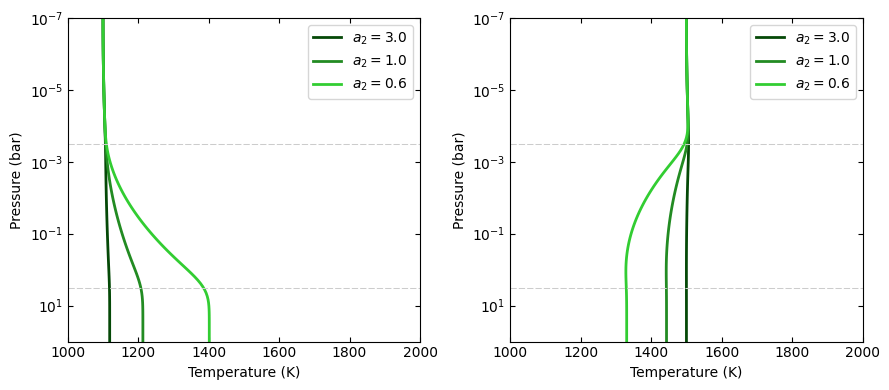

In [15]:
# a2 sets the temperature gradient between p3 < p < p1:
# a2 >> 0.0: isothermal layer, a2>0: T increases away from p2

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, 3.0, T0_ninv])
temp_madhu02 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, 1.0, T0_ninv])
temp_madhu03 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, 0.6, T0_ninv])

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, 3.0, T0_inv])
temp_madhu12 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, 1.0, T0_inv])
temp_madhu13 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, 0.6, T0_inv])


temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[4]
labels = [f'{pname}$={val}$' for val in (3.0, 1.0, 0.6)]

plt.figure(33, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(1000, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()
plt.tight_layout()

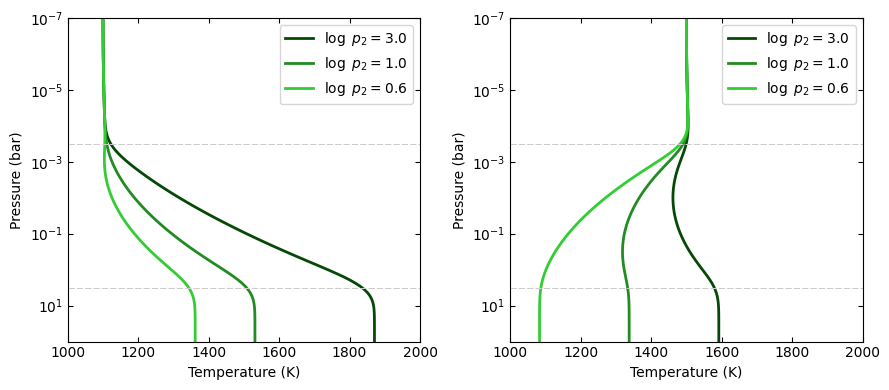

In [16]:
# log_p2 determines whether the atmosphere is thermally inverted
# (p1 < p2) or not (p1 > p2).

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, -6.0, log_p3, a1, a2, T0_ninv])
temp_madhu02 = tp_madhu([log_p1, -4.0, log_p3, a1, a2, T0_ninv])
temp_madhu03 = tp_madhu([log_p1, -3.0, log_p3, a1, a2, T0_ninv])
# Note that p2 values impact the profile even if p2 < p1
# temp_madhu03 is technically an inverted profile, but a tiny inv.

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, -2.0, log_p3, a1, a2, T0_inv])
temp_madhu12 = tp_madhu([log_p1, -0.5, log_p3, a1, a2, T0_inv])
temp_madhu13 = tp_madhu([log_p1, 1.0, log_p3, a1, a2, T0_inv])
# Note that p2 can have values larger than p3

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[1]
labels = [f'{pname}$={val}$' for val in (3.0, 1.0, 0.6)]

plt.figure(34, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(1000, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()
plt.tight_layout()

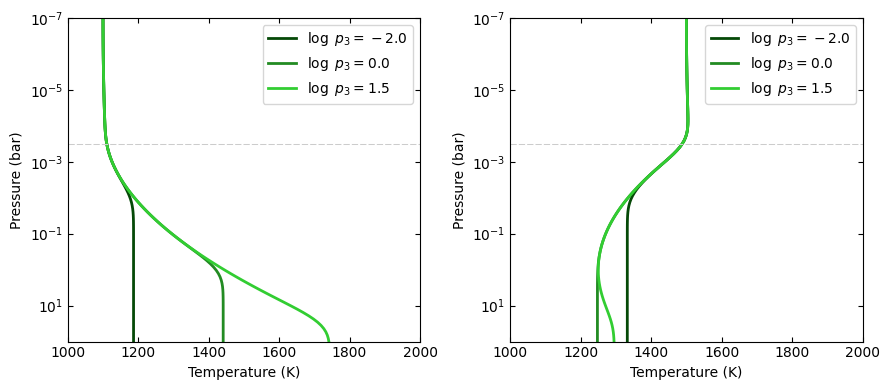

In [17]:
# logp3 sets the pressure of the isothermal lower layer:
# Note that p2 is allowed to be at a deeper location than p3

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, log_p2_ninv, -2.0, a1, a2, T0_ninv])
temp_madhu02 = tp_madhu([log_p1, log_p2_ninv, 0.0, a1, a2, T0_ninv])
temp_madhu03 = tp_madhu([log_p1, log_p2_ninv, 1.5, a1, a2, T0_ninv])

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, log_p2_inv, -2.0, a1, a2, T0_inv])
temp_madhu12 = tp_madhu([log_p1, log_p2_inv, 0.0, a1, a2, T0_inv])
temp_madhu13 = tp_madhu([log_p1, log_p2_inv, 1.5, a1, a2, T0_inv])

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[2]
labels = [f'{pname}$={val}$' for val in (-2.0, 0.0, 1.5)]

plt.figure(35, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(1000, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()
plt.tight_layout()

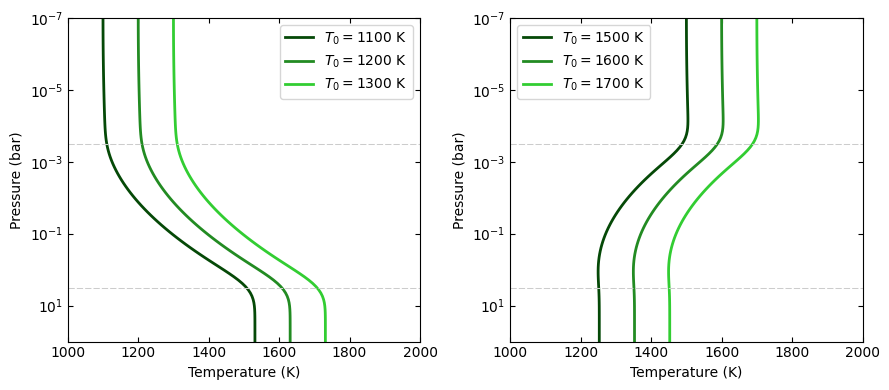

In [18]:
# T0 sets the temperature at the top of the profile:
# This shifts the entire profile

# Non-inverted TP profile
temp_madhu01 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, a2, 1100.0])
temp_madhu02 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, a2, 1200.0])
temp_madhu03 = tp_madhu([log_p1, log_p2_ninv, log_p3, a1, a2, 1300.0])

# Inverted TP profile
temp_madhu11 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, a2, 1500.0])
temp_madhu12 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, a2, 1600.0])
temp_madhu13 = tp_madhu([log_p1, log_p2_inv, log_p3, a1, a2, 1700.0])

temps_madhu = [
    [temp_madhu01,temp_madhu02,temp_madhu03],
    [temp_madhu11,temp_madhu12,temp_madhu13],
]
pname = tp_madhu.texnames[5]
labels = [
    f'{pname}$={val}$ K'
    for val in (1100, 1200, 1300, 1500, 1600, 1700)
]

plt.figure(36, (9.0,4.0))
plt.clf()
for i in [0,1]:
    ax = plt.subplot(1,2,1+i)
    ax.plot(temps_madhu[i][0], pressure, color='xkcd:darkgreen', lw=2.0, label=labels[3*i+0])
    ax.plot(temps_madhu[i][1], pressure, color='forestgreen', lw=2.0, label=labels[3*i+1])
    ax.plot(temps_madhu[i][2], pressure, color='limegreen', lw=2.0, label=labels[3*i+2])
    ax.axhline(10**log_p1, lw=0.75, dashes=(6,2), color='0.8')
    ax.axhline(10**log_p3, lw=0.75, dashes=(6,2), color='0.8')
    ax.set_yscale('log')
    ax.tick_params(which='both', right=True, top=True, direction='in')
    ax.set_xlim(1000, 2000)
    ax.set_ylim(np.amax(pressure), np.amin(pressure))
    ax.set_xlabel('Temperature (K)')
    ax.set_ylabel('Pressure (bar)')
    ax.legend()
plt.tight_layout()